# Transfer Learning for Image Classification

## Importing the libraries

In [ ]:
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pylab as plt
from keras.preprocessing import image

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Data Preprocessing

## 1.1 Preprocessing the Training set

In [ ]:
BATCH_SIZE, IMG_SIZE = 16, (300, 300)
train = tf.keras.utils.image_dataset_from_directory('dataset/train',
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     image_size=IMG_SIZE)

Found 4609 files belonging to 2 classes.


## 1.2 Preprocessing the Test set

In [ ]:
test = tf.keras.utils.image_dataset_from_directory('dataset/test',
                                                    shuffle=True,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMG_SIZE)

Found 2303 files belonging to 2 classes.


## 1.3 Checking the class_name & previews

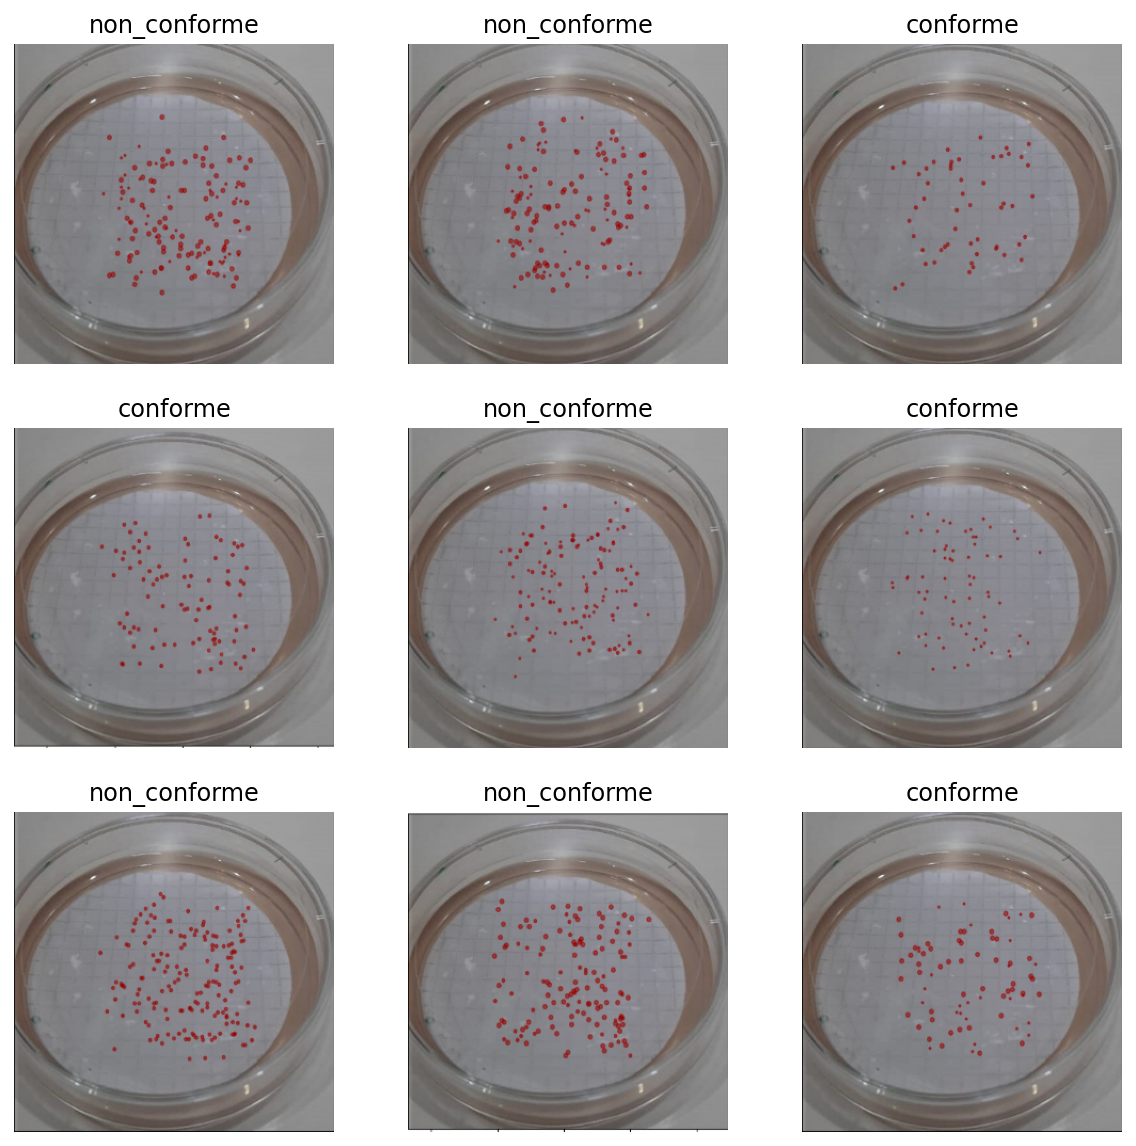

In [ ]:
class_names = train.class_names

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## 1.4 Configure the dataset for performance

In [ ]:
val_batches = tf.data.experimental.cardinality(test)
test_dataset = test.take(val_batches // 5)
validation_dataset = test.skip(val_batches // 5)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# 2. Building the CNN

### Initialising the Pretrained Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobnet = MobileNetV2(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

### Let's not retrain MobileNetV2 Layers

In [ ]:
for layer in mobnet.layers:
    layer.trainable = False

### Adding a single layer on top of MobileNetV2

In [ ]:
model = keras.Sequential([
    mobnet,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

# 3. Training the CNN

### 3.1  Compiling the CNN

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3.2 Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

Epoch 1/15
289/289 [==============================] - 35s 83ms/step - loss: 2.5469 - accuracy: 0.8273 - val_loss: 0.2732 - val_accuracy: 0.8765
Epoch 2/15
289/289 [==============================] - 21s 74ms/step - loss: 0.3180 - accuracy: 0.8655 - val_loss: 0.4131 - val_accuracy: 0.8043
Epoch 3/15
289/289 [==============================] - 22s 75ms/step - loss: 0.3411 - accuracy: 0.8340 - val_loss: 0.4177 - val_accuracy: 0.7881
Epoch 4/15
289/289 [==============================] - 21s 74ms/step - loss: 0.2725 - accuracy: 0.8776 - val_loss: 0.2091 - val_accuracy: 0.9181
Epoch 5/15
289/289 [==============================] - 22s 74ms/step - loss: 0.2129 - accuracy: 0.9065 - val_loss: 0.1904 - val_accuracy: 0.9170
Epoch 6/15
289/289 [==============================] - 22s 74ms/step - loss: 0.2082 - accuracy: 0.9028 - val_loss: 0.1867 - val_accuracy: 0.9218
Epoch 7/15
289/289 [==============================] - 22s 75ms/step - loss: 0.2320 - accuracy: 0.8978 - val_loss: 0.1896 - val_accuracy:

### 3.3 Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 10, 1280)     2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 256)               32768256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,026,497
Trainable params: 32,768,513
Non-trainable params: 2,257,984
____________________________________

## 4. Evaluation & Prediction

### 4.1 Making a single prediction

In [ ]:
test_image = image.load_img('dataset/test/conforme/entercoque_287.jpg', target_size = IMG_SIZE)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
prediction = 'non_conforme' if result[0][0] else 'conforme'

In [ ]:
print(prediction)

In [ ]:
test_image = image.load_img('dataset/test/non_conforme/entercoque_60.jpg', target_size = IMG_SIZE)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
prediction = 'non_conforme' if result[0][0] else 'conforme'

In [ ]:
print(prediction)

In [ ]:
from tensorflow.keras.preprocessing import image
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (300, 300))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)

    pred = model.predict(test_image)
    result = np.where(pred < 0.656, 0, 1) #<--to get the binary category
    print(result)
    prediction = 'non_conforme' if result[0][0] else 'conforme'
    print(pred)
    print (prediction)

In [ ]:
testing_image('dataset/test/conforme/entercoque_620.png')

1/1 [==============================] - 1s 835ms/step
[[0]]
[[0.23214023]]
conforme


### 4.2 Evaluating the model on test_data

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print('Test accuracy :', accuracy)

28/28 [==============================] - 2s 48ms/step - loss: 0.2415 - accuracy: 0.9152
Test accuracy : 0.9151785969734192


# 5. Visualization

### 5.1 Learning curves

In [ ]:
history = model.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

KeyError: 'accuracy'

### 5.2 The performance of the model to make predictions

Predictions:
 [0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1]
Labels:
 [0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1]


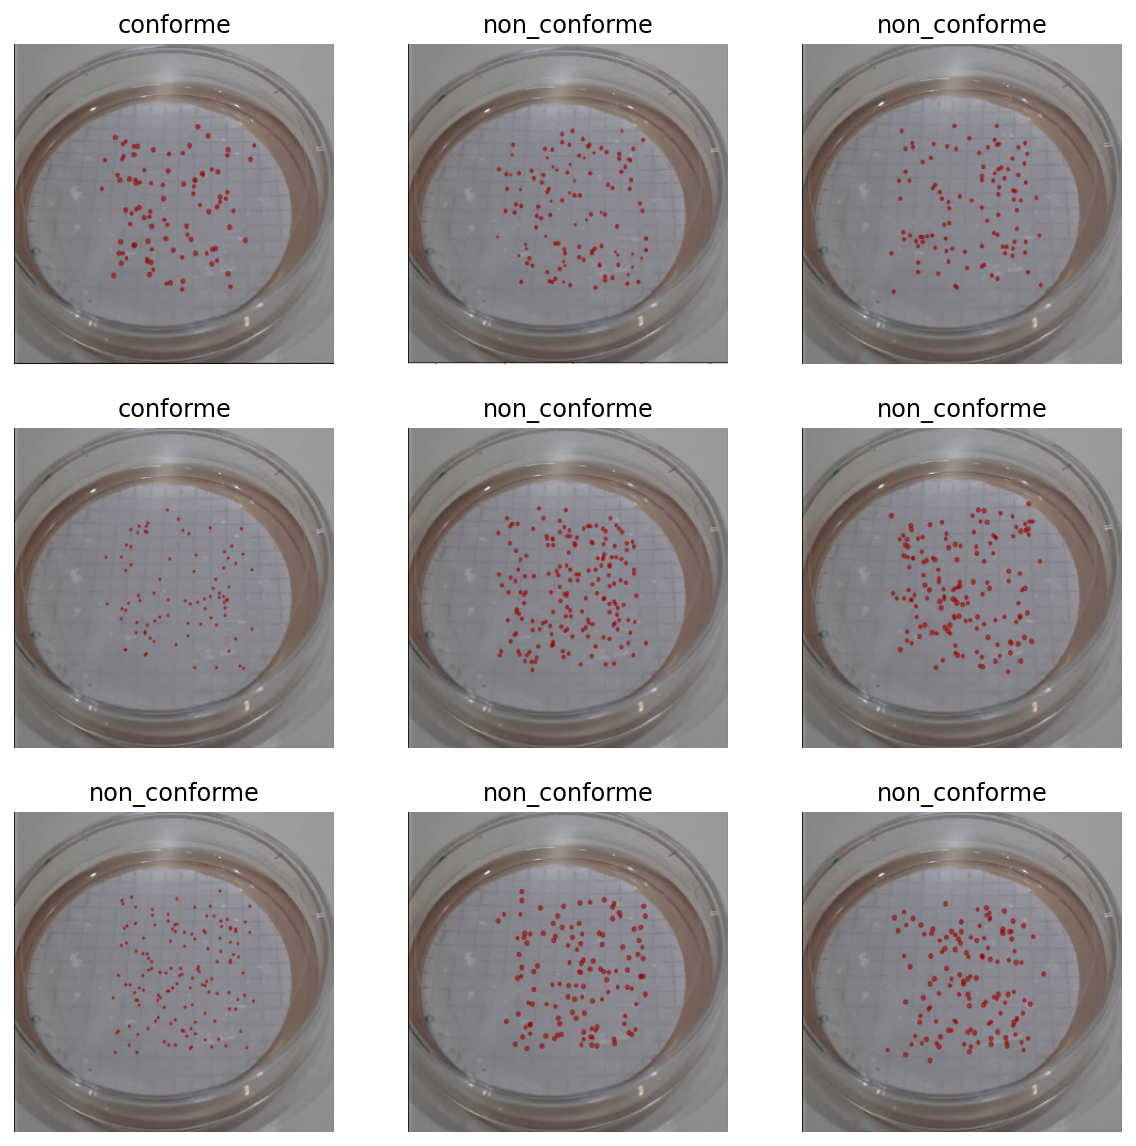

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.656, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

## 6. Serialize model to HDF5

In [ ]:
cnn_clf.save_weights("transfer_learning_model.h5")

## 7. Saving the model

In [ ]:
model.save('transfer_learning_model')

INFO:tensorflow:Assets written to: nouha_model\assets


INFO:tensorflow:Assets written to: nouha_model\assets


## 7. Loading the model back

In [ ]:
model = tf.keras.models.load_model('transfer_learning_model')